In [1]:
source('init.r')

## Numerical Features as Categorical Features

Age is a numerical feature.

Age has missing values.

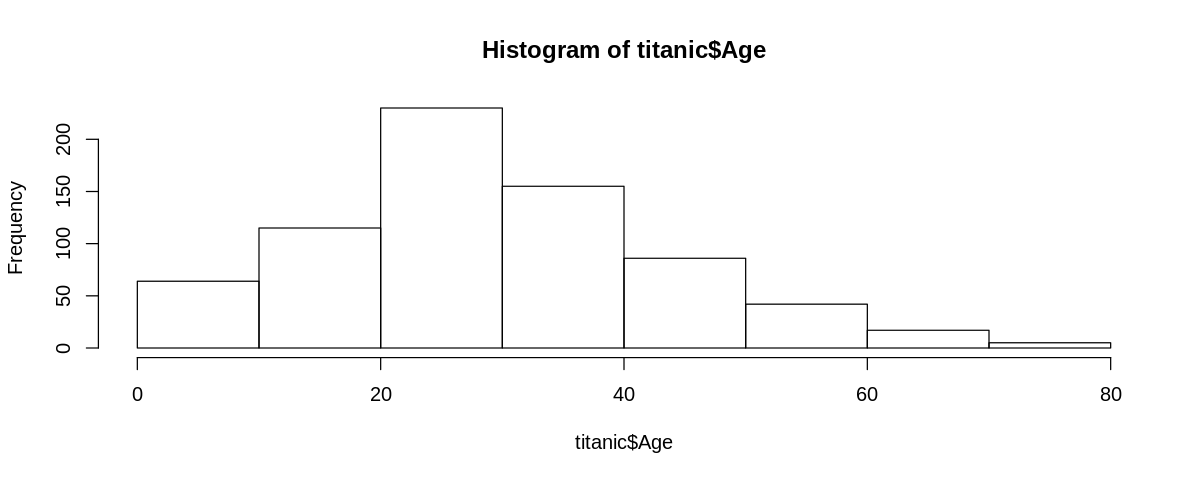

In [2]:
hist(titanic$Age)

In [3]:
missing_age_values_mask = is.na(titanic$Age)

In [4]:
head(titanic$Survived[missing_age_values_mask])

[1] 0 1 1 0 1 0

In [5]:
survived_mask = as.logical(titanic$Survived)

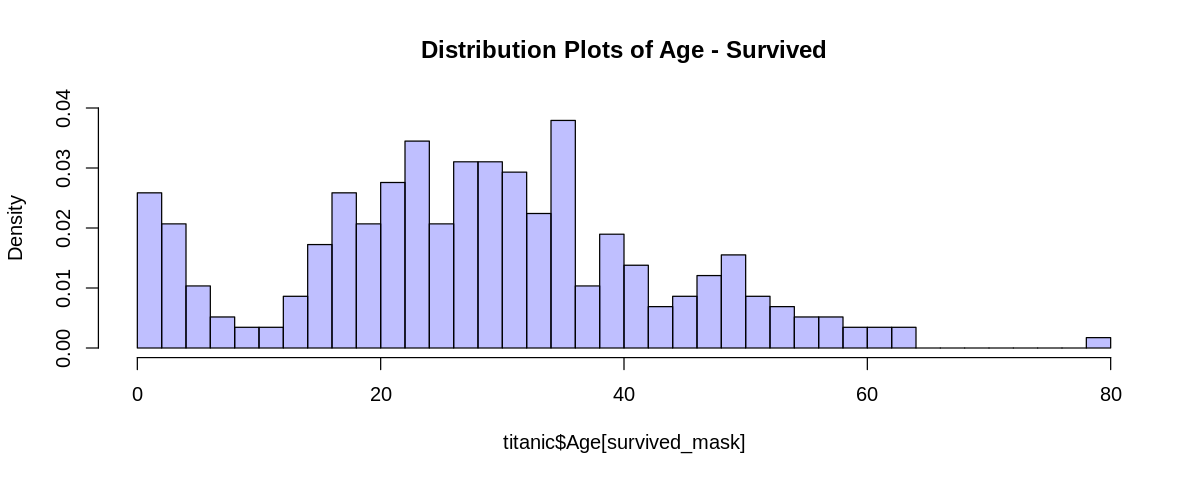

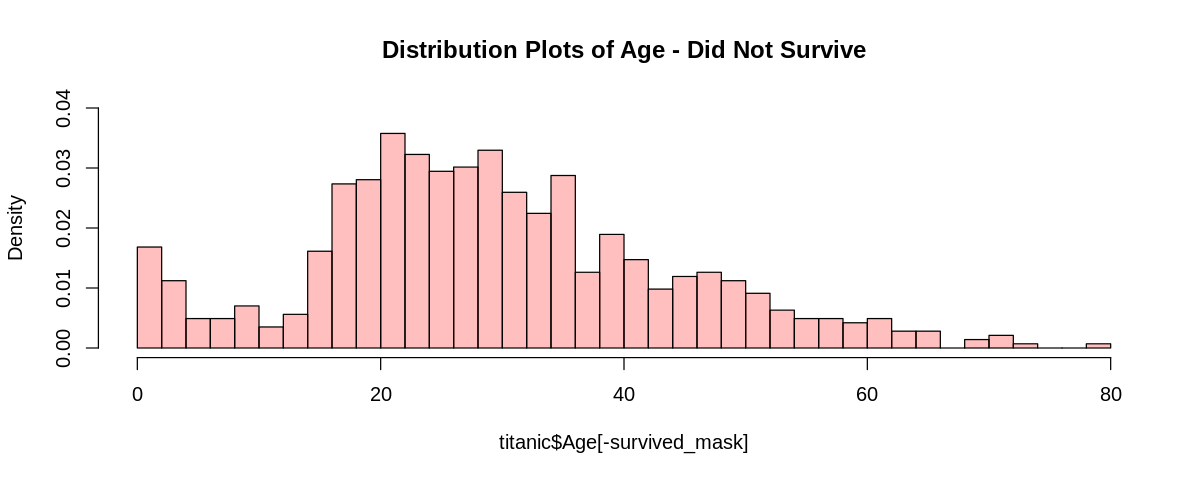

In [6]:
h1 = hist(titanic$Age[survived_mask], col=rgb(0,0,1,1/4), 
          freq = F, breaks = 30, ylim = c(0,0.04),
          main='Distribution Plots of Age - Survived')
h2 = hist(titanic$Age[-survived_mask], col=rgb(1,0,0,1/4), 
          freq = F, breaks = 30, ylim = c(0,0.04),
          main = 'Distribution Plots of Age - Did Not Survive')


#### create a mask of just children

In [7]:
children_mask = titanic$Age < 10

#### duplicate and filter to create a model, `women_survived`

In [8]:
women_and_children_survived = rep(women_survived)
women_and_children_survived[children_mask] = 1

#### assess accuracy of  model, `women_survived`

In [9]:
accuracy(titanic$Survived, women_and_children_survived)

[1] 0.7934905

In [10]:
scores = c(accuracy(titanic$Survived, no_survivors),
           accuracy(titanic$Survived, random_model),
           accuracy(titanic$Survived, women_survived),
           accuracy(titanic$Survived, women_and_first_class_survived),
           accuracy(titanic$Survived, women_and_children_survived))

#### Progress Report

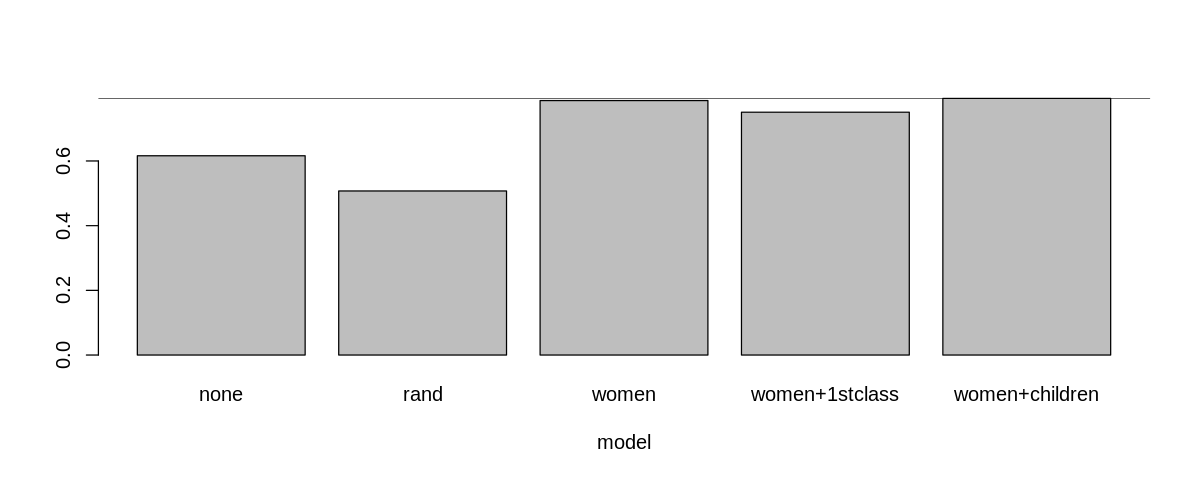

In [11]:
barplot(scores, xlab = 'model', 
        names.arg = c('none','rand','women', 'women+1stclass', 'women+children'))
abline(h = max(scores))

In [12]:
child_survival_by_age = function (age) {
    children_mask = titanic$Age < age

    women_and_children_survived = rep(women_survived)
    women_and_children_survived[children_mask] = 1

    return(accuracy(titanic$Survived, women_and_children_survived))
}


In [13]:
ages = 1:20

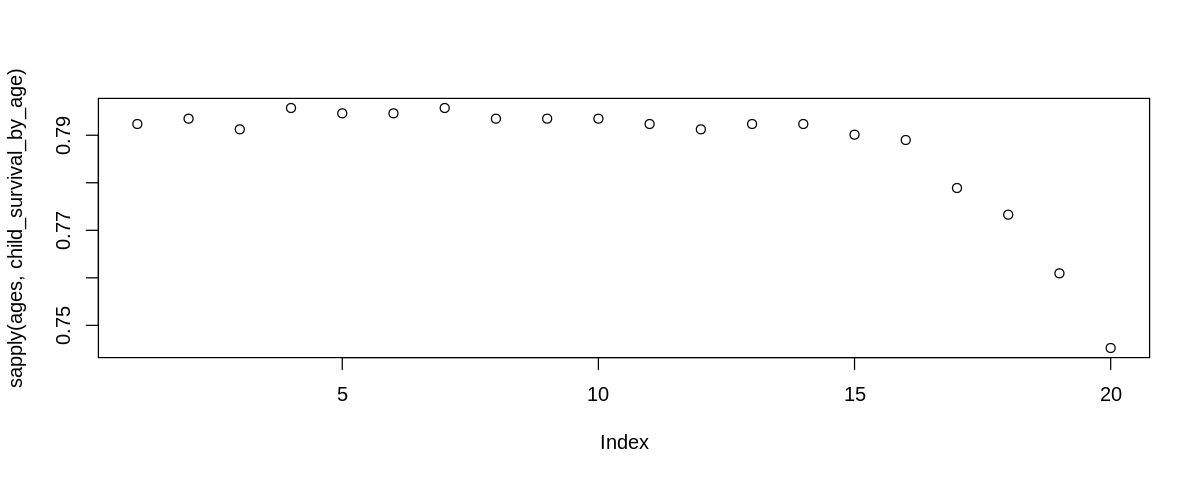

In [14]:
plot(sapply(ages, child_survival_by_age))

#### create a mask of just children

In [15]:
children_mask = titanic$Age < 7

#### duplicate and filter to create a model, `women_survived`

In [16]:
women_and_children_survived = rep(women_survived)
women_and_children_survived[children_mask] = 1

#### assess accuracy of  model, `women_survived`

In [17]:
accuracy(titanic$Survived, women_and_children_survived)

[1] 0.7957351

In [18]:
scores = c(accuracy(titanic$Survived, no_survivors),
           accuracy(titanic$Survived, random_model),
           accuracy(titanic$Survived, women_survived),
           accuracy(titanic$Survived, women_and_first_class_survived),
           accuracy(titanic$Survived, women_and_children_survived))

#### Progress Report

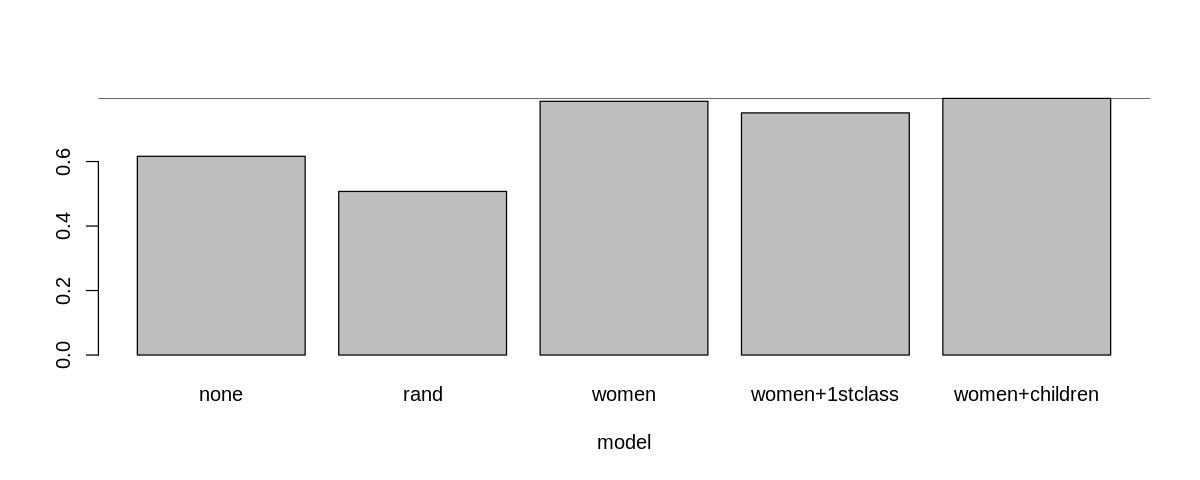

In [19]:
barplot(scores, xlab = 'model', 
        names.arg = c('none','rand','women', 'women+1stclass', 'women+children'))
abline(h = max(scores))